In [11]:
from sympy import *
from dtumathtools import *
import numpy as np
import matplotlib.pyplot as plt
t, a, b, g1, s, n, w = symbols('t, a, b, g1, s, n, w')

# Problem 1

We know
\begin{gather}
\frac{d}{dt}\begin{bmatrix} j \\ x \\ v \end{bmatrix} = \begin{bmatrix} -\alpha && 0 && -1 \\ 0 && 0 && 1 \\ 1 && 0 && -\beta \end{bmatrix} \begin{bmatrix} j \\ x \\ v \end{bmatrix} + \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}u(t) \\
u(t) = g_1[z(t) - x(t)]
\end{gather}
Then substitute $u(t) = g_1[z(t) - x(t)]$ into the system.
\begin{gather}
\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}u(t) = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}g_1[z(t) - x(t)] = \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}z(t) - \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}x(t)\\
\frac{d}{dt}\begin{bmatrix} j \\ x \\ v \end{bmatrix} = \begin{bmatrix} -\alpha && 0 && -1 \\ 0 && 0 && 1 \\ 1 && 0 && -\beta \end{bmatrix} \begin{bmatrix} j \\ x \\ v \end{bmatrix} + \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}z(t) - \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}x(t) = \\
\begin{bmatrix} -\alpha \\ 0 \\ 1 \end{bmatrix}j(t) + \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}x(t) + \begin{bmatrix} -1 \\ 1 \\ -\beta \end{bmatrix}v(t) + \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}z(t) - \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}x(t) =\\
\begin{bmatrix} -\alpha \\ 0 \\ 1 \end{bmatrix}j(t) + \begin{bmatrix} -1 \\ 1 \\ -\beta \end{bmatrix}v(t) + \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}z(t) - \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}x(t) =\\
=\begin{bmatrix} -\alpha && -g_1 && -1 \\ 0 && 0 && 1 \\ 1 && 0 && -\beta \end{bmatrix} \begin{bmatrix} j \\ x \\ v \end{bmatrix} + \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}z(t) 
\end{gather}

# Problem 2

\begin{equation}
z(t) =
\begin{cases} 
\frac{2}{T}t & \text{for } 0 \leq t < \frac{T}{2}, \\
\frac{2}{T}(T - t) & \text{for } \frac{T}{2} \leq t < T.
\end{cases}
\end{equation}
$T = 20\pi$


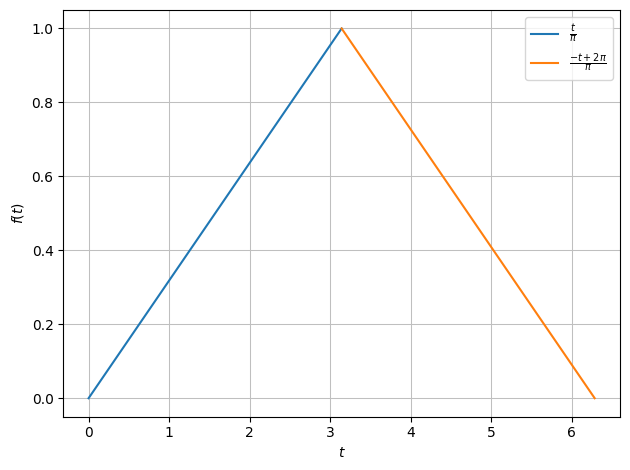

In [3]:
T = 2*pi
f1 = 2/T *t
f2 = 2/T*(T-t)
plt = dtuplot.plot(f1, (t, 0, T/2), show=False)
plt.extend(dtuplot.plot(f2, (t, T/2 ,T), show=False))
plt.show()

# Problem 3

\begin{equation}
y(t) = 
\begin{bmatrix}
0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
j(t) \\ x(t) \\ v(t)
\end{bmatrix}
= x(t),
\end{equation}

The transfer function is defined as $H(s) = -d^T(A-sI)^{-1}b$, where $s$ is not an eigenvalue of A, $d = [0,1,0]^T$, $b = \begin{bmatrix} g_1 \\ 0 \\ 0 \end{bmatrix}$.

In [4]:
A = Matrix([[-a, 0 ,-1],[0, 0, 1],[1, 0, -b]])
d = Matrix([0, 1, 0])
b = Matrix([g1, 0, 0])
I_m = Matrix([[1,0,0],[0,1,0],[0,0,1]])

In [5]:
H = d.T*(A-s*I_m)**(-1)*b
H = H[0]
H

-g1/(a*b*s + a*s**2 + b*s**2 + s**3 + s)

In [6]:
H.subs({s:w*n*I}).simplify()

g1/(n*w*(-I*a*b + a*n*w + b*n*w + I*n**2*w**2 - I))

In [7]:
A.eigenvects()

[(0,
  1,
  [Matrix([
   [0],
   [1],
   [0]])]),
 (-a/2 - b/2 - sqrt((a - b - 2)*(a - b + 2))/2,
  1,
  [Matrix([
   [                                 -a/2 + b/2 - sqrt((a - b - 2)*(a - b + 2))/2],
   [(-a - b)/(a*b + 1) - (-a/2 - b/2 - sqrt((a - b - 2)*(a - b + 2))/2)/(a*b + 1)],
   [                                                                            1]])]),
 (-a/2 - b/2 + sqrt((a - b - 2)*(a - b + 2))/2,
  1,
  [Matrix([
   [                                 -a/2 + b/2 + sqrt((a - b - 2)*(a - b + 2))/2],
   [(-a - b)/(a*b + 1) - (-a/2 - b/2 + sqrt((a - b - 2)*(a - b + 2))/2)/(a*b + 1)],
   [                                                                            1]])])]

\begin{equation}
H(in\omega) = -\frac{g_1(n\omega(a+b)+i(ab+1-n^2\omega^2))}{n\omega(n^2\omega^2(a+b)^2 + (ab+1-n^2\omega^2))}
\end{equation}
$n \neq 0, in\omega \neq \frac{-\alpha - \beta \pm \sqrt{(\alpha - \beta)^2 - 4)}}{2}$

# Problem 4

It is known that
\begin{equation}
z(t) = \frac{1}{2} + \sum_{n = -\infty, n \neq 0}^{\infty} \frac{(-1)^n - 1}{n^2 \pi^2} e^{in\omega t}, \text{ where } \omega = \frac{2\pi}{T}
\end{equation}
As $c_n$ is only non-zero for odd values we can substitute $2n-1$ instead of $n$.
\begin{equation}
z(t) = \frac{1}{2} + \sum_{n = -\infty}^{\infty} \frac{-2}{(2n-1)^2 \pi^2} e^{i(2n-1)\omega t}
\end{equation}
The only issue with this can be the non-symmetry of $2n-1$ with respect to the sign of $n$. For $n = 1 \Rightarrow (2n-1) = 1$, but for $n = -1 \Rightarrow (2n-1) = -3$. Therefore, we need to split the interval into positive and negative intervals. 
$S_N(t) = \frac{1}{2} + \sum_{n = 0}^{\infty} \left[ \frac{-2}{(2n-1)^2 \pi^2} e^{i(2n-1)\omega t} + \frac{2}{(2n-1)^2 \pi^2} e^{-i(2n-1)\omega t} \right]$.
But I don't see why would anyone introduce additional complexity instead of keeping a simple definition for $c_n$ as we have been given.

The solution of the system is,
\begin{equation}
x(t) = \sum_{n = -\infty, n \neq 0}^{\infty} \frac{(-1)^n - 1}{n^2 \pi^2} H(in\omega) e^{in\omega t} = \sum_{n = -\infty, n \neq 0}^{\infty} \frac{(-1)^n - 1}{n^2 \pi^2} \frac{g_1(n\omega(a+b)+i(ab+1-n^2\omega^2))}{n\omega(n^2\omega^2(a+b)^2 + (ab+1-n^2\omega^2))} e^{in\omega t}
\end{equation}
We exclude $n=0$ as the transfer function can't take this value. 

# Problem 5

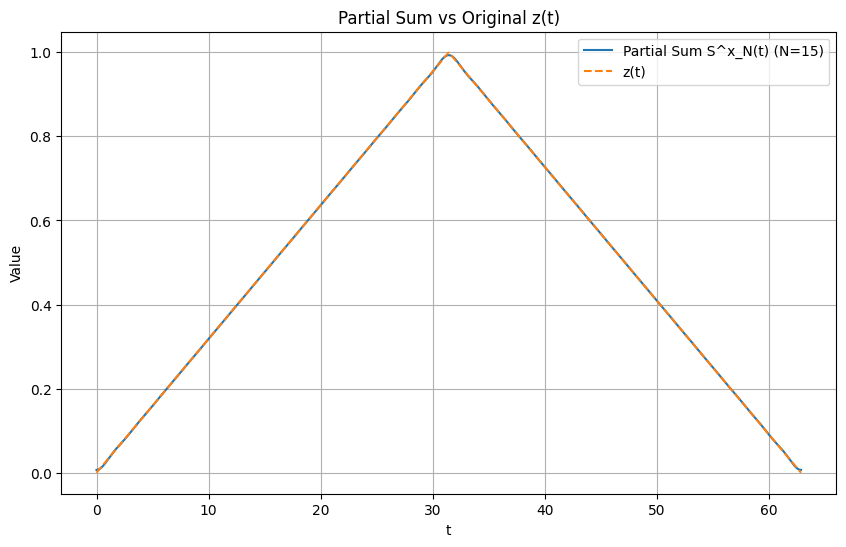

In [26]:
T = 20 * np.pi
omega = 2 * np.pi / T
N = 15
t = np.linspace(0, T, 1000)  

def c_n(n):
    return -2 / ((2 * n - 1)**2 * np.pi**2)  

def partial_sum(t, N):
    result = 0.5  
    for n in range(1, N + 1):
        result += c_n(n) * np.exp(1j * (2 * n - 1) * omega * t)
        result += c_n(n) * np.exp(-1j * (2 * n - 1) * omega * t)
    return result.real  # Take the real part


S_N_t = partial_sum(t, N)
z_t = np.piecewise(t, [t < T / 2, t >= T / 2], [lambda t: 2 * t / T, lambda t: 2 * (T - t) / T])

plt.figure(figsize=(10, 6))
plt.plot(t, S_N_t, label=f'Partial Sum S^x_N(t) (N={N})')
plt.plot(t, z_t, label='z(t)', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Partial Sum vs Original z(t)')
plt.legend()
plt.grid()
plt.show()

The Fourier series of the function, up to 𝑁 terms, provides an excellent approximation of the function.

We can see from the plot that the T periodic forcing function $z(t)$ is bounded for all $t \in [-\infty, +\infty]$. This implies from definition 2.45 that the system is BIBO stable.

This is also evident from the relation we wound in the previous project for the system to be asymptotically stable $g_1 < (\alpha + \beta)(1 + \alpha \beta)$

$0.2 < (0.2)(1+0.01)$